# cleanup rtsys source data

In [11]:
import glob

import numpy as np

# cognac data and tools
import cognac.insitu as iu

---
## load data

In [2]:
# select campaign

#campaign = 'microco_leg2'
#campaign = 'lopstech19_leg1'
#campaign = 'cognac20'
campaign = 'sumos21'

cp = iu.campaign(campaign)

In [3]:
# load source data
unit = 'emetteur'
sdata = iu.source.load_source_files(cp[unit]['path'], label=unit)

Reads /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/deploiement1/emetteur/data/210303/mission_2021-03-03_14-03-01.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/deploiement1/emetteur/data/210303/mission_2021-03-03_14-42-11.txt


In [4]:
# inspect gps data
sdata.gps.d.head()

,lon,lat,velocity
time,,,
2021-03-03 14:03:25,-6.789164,46.266165,NaN
2021-03-03 14:03:26,-6.789247,46.266157,6.398703
2021-03-03 14:03:27,-6.789298,46.266152,3.976079
2021-03-03 14:03:28,-6.789361,46.266152,4.819888
2021-03-03 14:03:29,-6.789428,46.266151,5.153552


In [5]:
#sdata.gps.d.fillna(0., inplace=True)

In [6]:
sdata.gps.plot_bk(unit=cp['source'], rule='1T')

Loading BokehJS ...

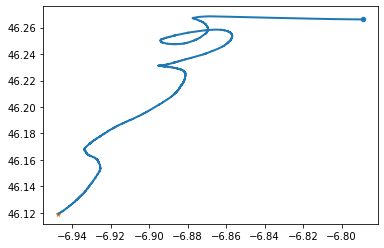

In [7]:
sdata.gps.plot()

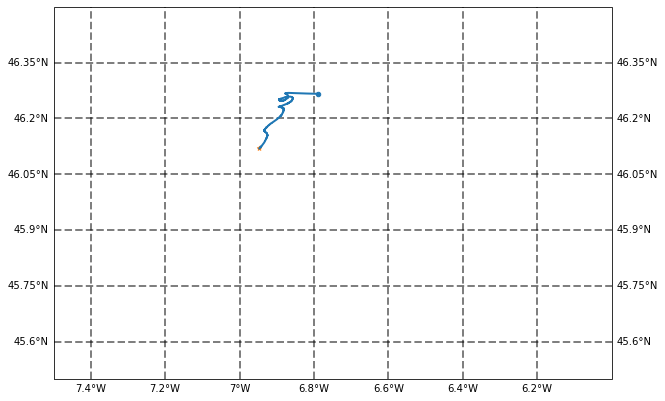

In [8]:
fac = iu.utils.plot_map(cp=cp, coast='110m')
sdata.gps.plot(fac)

---
## clean up data and divide by deployments

In [9]:
# clean gps data with deployment log
source={}
for s in cp['emetteur']:
    print(s)
    source[s.label] = sdata.clean_deployment(s, inplace=False)

d1 / start 2021-03-03 14:45:00 -7.00 46.00 / end 2021-03-05 10:49:00 -7.00 46.00


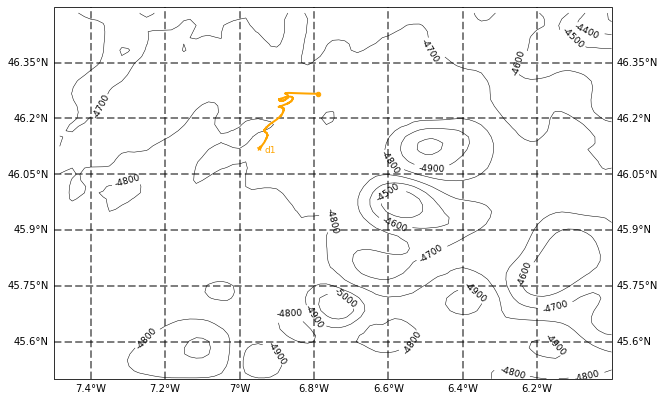

In [12]:
# plot overview map

bounds = [-8, -5, 44, 47]
bounds = cp.bounds

lvls = np.arange(-6000,0,100)
fac = iu.utils.plot_map(cp=cp, bounds=bounds)
iu.utils.plot_bathy(fac, bounds=bounds, levels=lvls)

for label, s in source.items():
    if s.gps:
        s.gps.plot(fac, label=label, color=cp['emetteur']['color'], offset=.01)

---
## store

In [13]:
for label, lsource in source.items():
    #lsource.to_pickle(cp.pathp+'source_log_'+label+'.p')
    lsource.to_nc(cp.pathp+'emetteur_*_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/emetteur_gps_d1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2021_sumos/data/datap/emetteur_emission_d1.nc


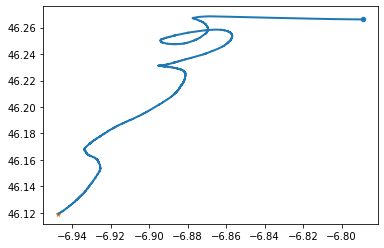

In [14]:
# reload
_source = {}
for label, lsource in source.items():
    _source[label] = iu.source.source_rtsys(file=cp.pathp+'emetteur_*_'+label+'.nc')
_source[label].gps.plot()